<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PROJECT-PLAN" data-toc-modified-id="PROJECT-PLAN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PROJECT PLAN</a></span><ul class="toc-item"><li><span><a href="#GOAL" data-toc-modified-id="GOAL-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>GOAL</a></span></li><li><span><a href="#SUMMARY" data-toc-modified-id="SUMMARY-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>SUMMARY</a></span></li><li><span><a href="#Data-Dictionary-for-Encoded-Attributes-used-in-Modelling" data-toc-modified-id="Data-Dictionary-for-Encoded-Attributes-used-in-Modelling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Dictionary for Encoded Attributes used in Modelling</a></span></li></ul></li><li><span><a href="#DATA-ACQUISITION" data-toc-modified-id="DATA-ACQUISITION-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DATA ACQUISITION</a></span><ul class="toc-item"><li><span><a href="#DATA-SUMMARY" data-toc-modified-id="DATA-SUMMARY-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DATA SUMMARY</a></span></li></ul></li><li><span><a href="#DATA-PREPARATION" data-toc-modified-id="DATA-PREPARATION-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DATA PREPARATION</a></span></li><li><span><a href="#Explore" data-toc-modified-id="Explore-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Explore</a></span></li></ul></div>

**TITLE**

# PROJECT PLAN

- Use clustering to find possible features to predict our target.
- Walk through out individual work to combine ideas.
- Acquire and prepare zillow data.
- Explore data with visuals discuss/combine findings.
- Finalize how we want to handle the data.
- Try different models then decide what model we want to move forward with.

## GOAL

**Improve our original estimate of the log error by using clustering methodologies.**

**Identify the driver of logerror**

**Build a model to predict logerror**

## SUMMARY

## Data Dictionary for Encoded Attributes used in Modelling

**PACKAGES**

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# general
import pandas as pd
import numpy as np


# explore/ stat
import scipy.stats as stats

# visuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D



# default pandas decimal display formatting
pd.options.display.float_format='{:20,.2f}'.format

# support modules
from env import host, user, password
import acquire
# look at function for summarize plot
import summarize
import prepare
import explore
import split_scale


# modeling
from sklearn.cluster import KMeans, dbscan
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


# DATA ACQUISITION

Retrieve from Zillow_db:

- Latest trasaction occured within the year of 2017 for each property

- Associated logerror

- All fields related to each properties

- Gather descriptions by joining description tables

- Only properties with latitude and longitude

- Only single family homes 

> select single family residential  
>
> remove unit count = 2 and 3
>
> exluded house with no bedroom & no bathroom (doesn't count as a house)

In [2]:
# acquire data, only retreive 261 > single residential family
# df = acquire.get_zillow_data().set_index("parcelid")
df = pd.read_csv('query_result.csv').set_index("parcelid")

## DATA SUMMARY

In [4]:
summarize.df_summary(df)

--- Shape: (52169, 72)
--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52169 entries, 17052889 to 14447871
Data columns (total 72 columns):
county                          52169 non-null object
tax_rate                        52164 non-null float64
id                              52169 non-null int64
airconditioningtypeid           13605 non-null float64
airconditioningdesc             13605 non-null object
architecturalstyletypeid        70 non-null float64
architecturalstyledesc          70 non-null object
basementsqft                    47 non-null float64
bathroomcnt                     52169 non-null float64
bedroomcnt                      52169 non-null int64
buildingclasstypeid             0 non-null float64
buildingclassdesc               0 non-null float64
buildingqualitytypeid           33628 non-null float64
calculatedbathnbr               52153 non-null float64
calculatedfinishedsquarefeet    52161 non-null float64
decktypeid                      387 non-null flo

(-6734.775000000001, 697313.4]    51796
(697313.4, 1394390.8]                 8
(1394390.8, 2091468.2]                2
(2091468.2, 2788545.6]                1
(2788545.6, 3485623.0]                1
(3485623.0, 4182700.4]                0
(4182700.4, 4879777.8]                0
(4879777.8, 5576855.2]                0
(5576855.2, 6273932.6]                0
(6273932.6, 6971010.0]                7
Name: lotsizesquarefeet, dtype: int64
poolcnt:
1.00    11064
Name: poolcnt, dtype: int64
poolsizesum:
(22.523, 171.6]       6
(171.6, 319.2]       46
(319.2, 466.8]      320
(466.8, 614.4]      305
(614.4, 762.0]      121
(762.0, 909.6]       48
(909.6, 1057.2]       7
(1057.2, 1204.8]      5
(1204.8, 1352.4]      0
(1352.4, 1500.0]      2
Name: poolsizesum, dtype: int64
pooltypeid10:
1.00    443
Name: pooltypeid10, dtype: int64
pooltypeid2:
1.00    1071
Name: pooltypeid2, dtype: int64
pooltypeid7:
1.00    9977
Name: pooltypeid7, dtype: int64
propertycountylandusecode:
0100    26675
122     13

In [5]:
summarize.nulls_by_row(df)

,num_cols_missing,pct_cols_missing,parcelid
0,23,31.944444444444443,2
1,24,33.33333333333333,12
2,25,34.72222222222222,11
3,26,36.11111111111111,30
4,27,37.5,177
5,28,38.88888888888889,388
6,29,40.27777777777778,2525
7,30,41.66666666666667,2195
8,31,43.05555555555556,5985
9,32,44.44444444444444,8882


,num_rows_missing,pct_rows_missing
finishedsquarefeet15,52169,1.00
buildingclasstypeid,52169,1.00
buildingclassdesc,52169,1.00
finishedsquarefeet13,52169,1.00
storytypeid,52122,1.00
storydesc,52122,1.00
basementsqft,52122,1.00
yardbuildingsqft26,52106,1.00
architecturalstyletypeid,52099,1.00
architecturalstyledesc,52099,1.00


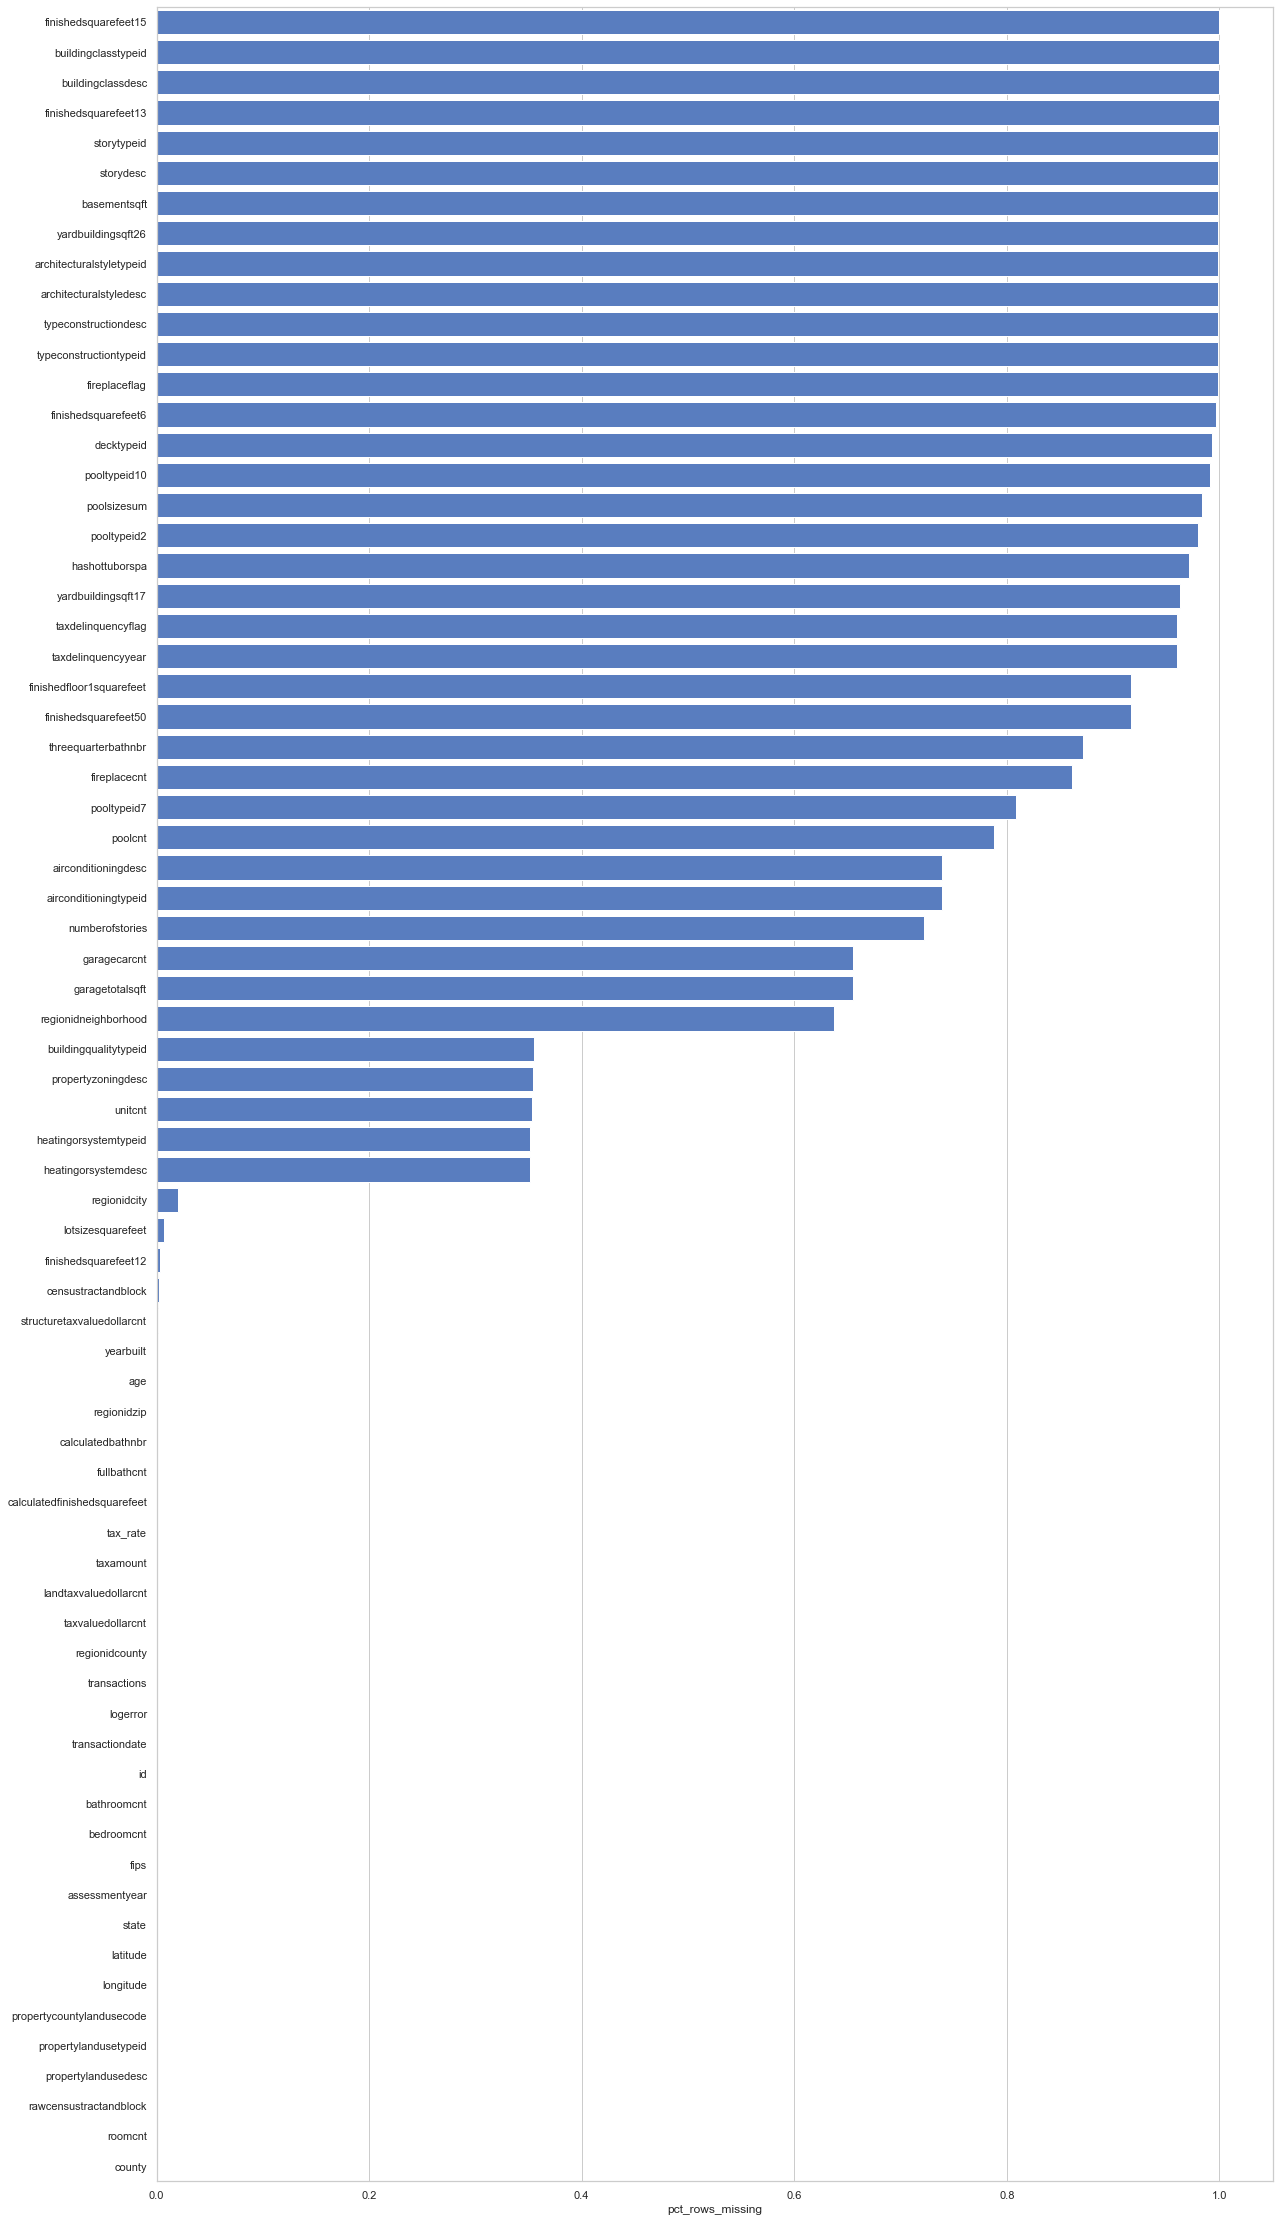

In [6]:
summarize.nulls_by_col(df)

**This function deals with missing values in the columns and the rows. If a row has more than 50% nulls, they will be removed. If a columns has more than 75% nulls, they will be removed.**

In [8]:
df = prepare.handle_missing_values(df, prop_required_column = .5, prop_required_row = .75)

In [10]:
df.shape

(52168, 38)

**Takeaway** Removed 39 columns with over 50% rows missing and over 75% columns missing

The following columns will need imputation.

In [11]:
summarize.report_remain_nulls_by_col(df, 1)

,num_rows_missing,pct_rows_missing
tax_rate,5,0.00
buildingqualitytypeid,18540,0.36
calculatedbathnbr,15,0.00
calculatedfinishedsquarefeet,7,0.00
finishedsquarefeet12,165,0.00
fullbathcnt,15,0.00
heatingorsystemtypeid,18344,0.35
heatingorsystemdesc,18344,0.35
lotsizesquarefeet,354,0.01
propertyzoningdesc,18478,0.35


# DATA PREPARATION

In [9]:
# remove unit counts of two and three
df = df [(df.unitcnt != 2) | (df.unitcnt != 3)]
# create new column to show age of house
df['age'] = 2017 - df.yearbuilt
# handle decimal place for longitude and latitude
df.loc[:,'latitude'] = df.loc[:,'latitude']/1e6
df.loc[:,'longitude'] = df.loc[:,'longitude']/1e6
# convert transactiondate into month/ categorical
df['transactiondate'] = pd.DatetimeIndex(df['transactiondate']).month

# calculatedfinishedsquarefeet with way less nulls than finishedsquarefeet12
# drop finishedsquarefeet12
df = df.drop(columns = ['propertycountylandusecode','fips','assessmentyear', 'regionidcounty','yearbuilt','propertylandusedesc','propertylandusetypeid','fullbathcnt','state','calculatedbathnbr','id','finishedsquarefeet12', 'buildingqualitytypeid', 'heatingorsystemtypeid', 'heatingorsystemdesc', 'propertyzoningdesc', 'propertyzoningdesc', 'unitcnt'])

# Explore

1. Distribution of logerror
2. Examine relationship between logerror and features https://seaborn.pydata.org/tutorial/distributions.html

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a206e6400>,
      dtype=object)

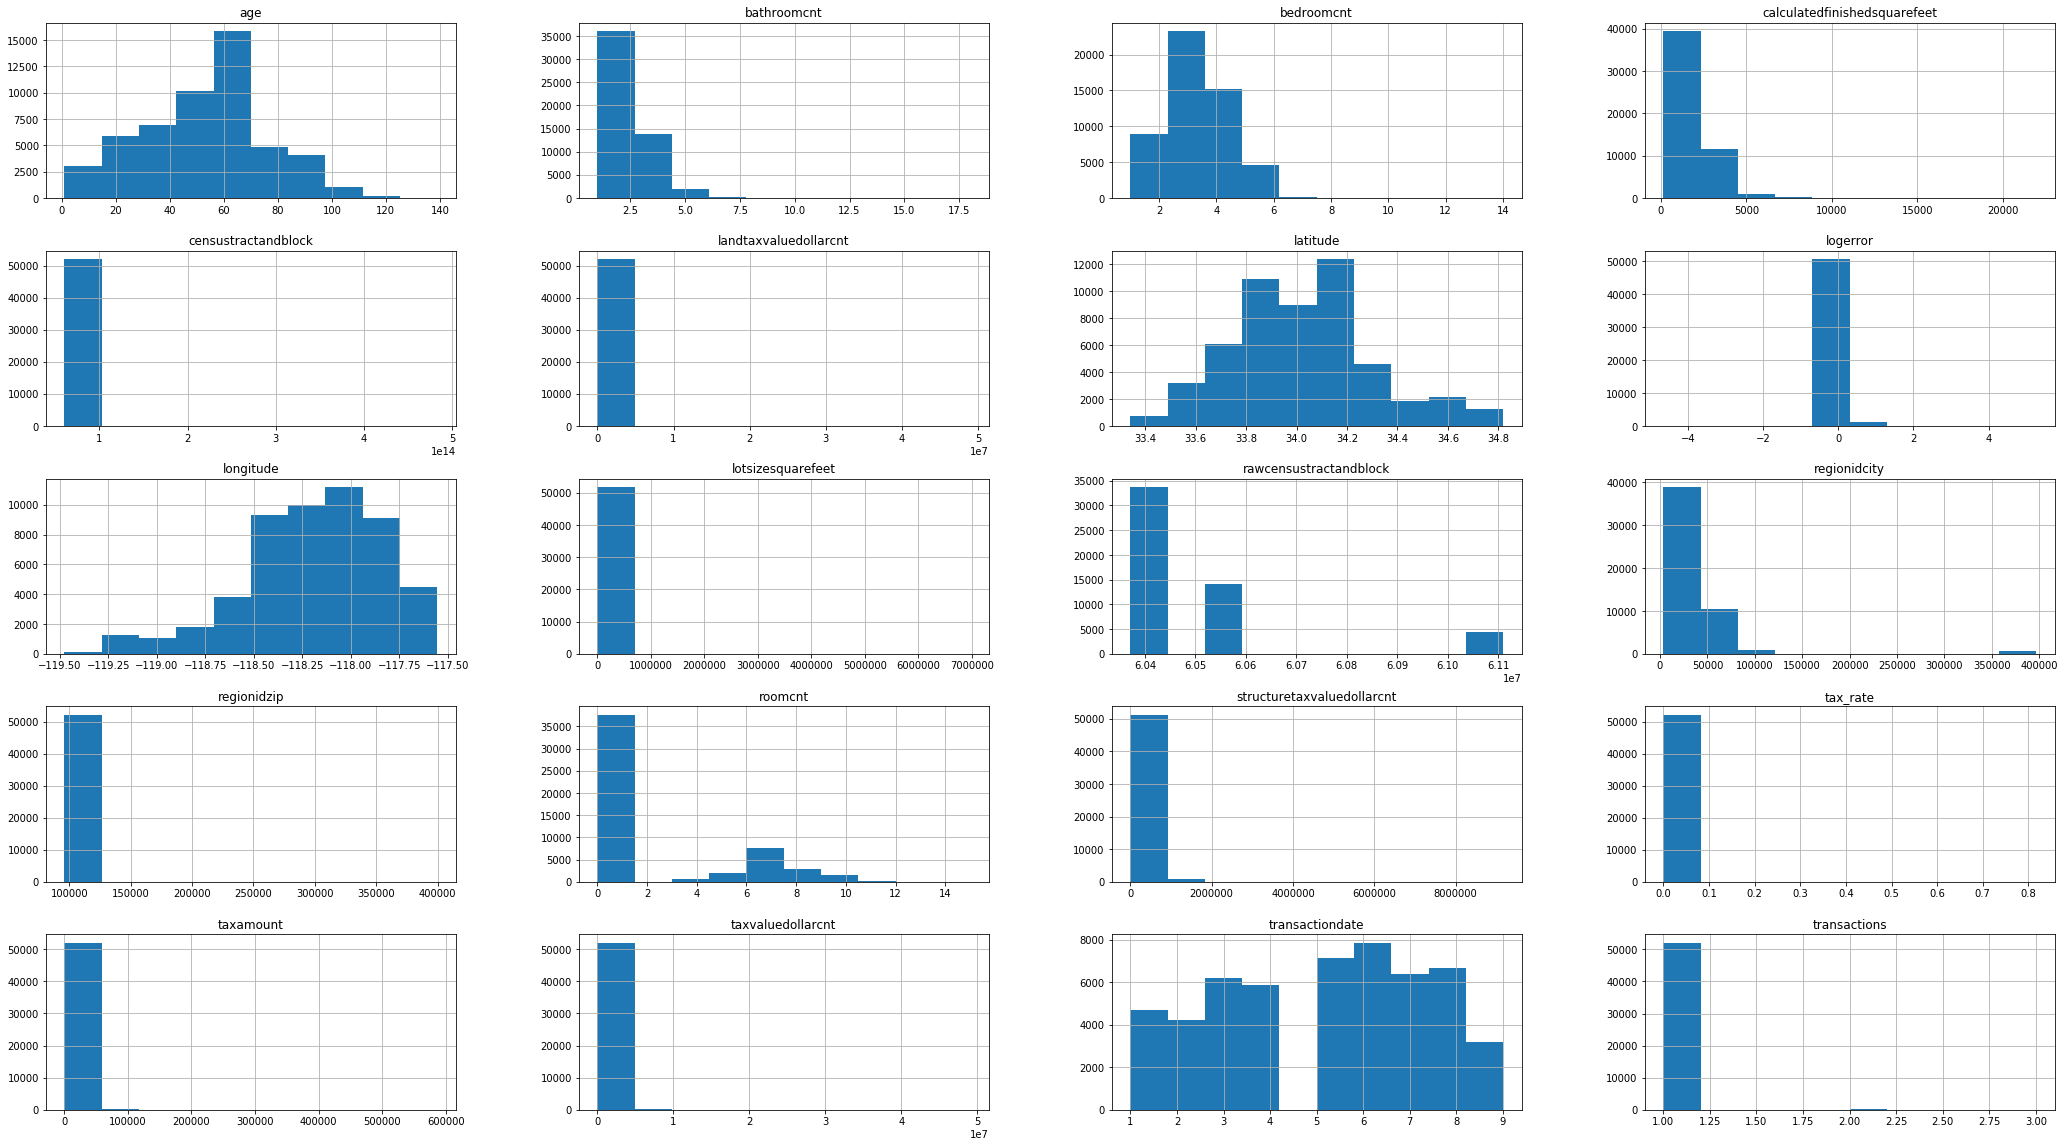

In [15]:
df.hist(figsize=(36,20))

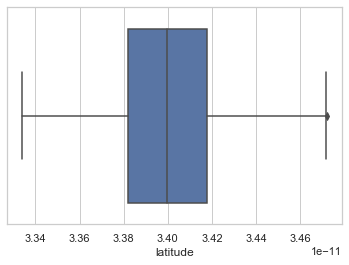

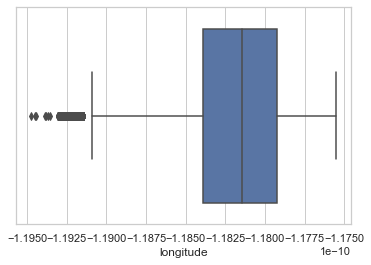

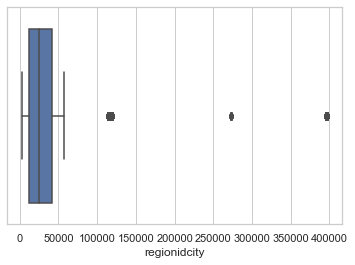

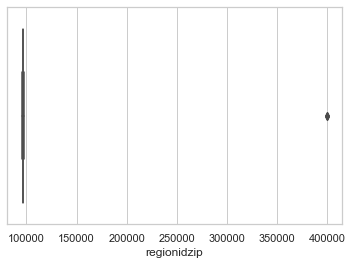

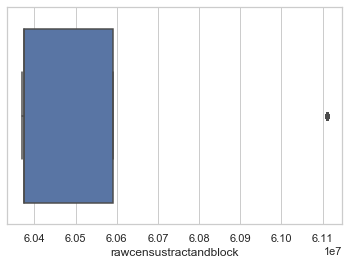

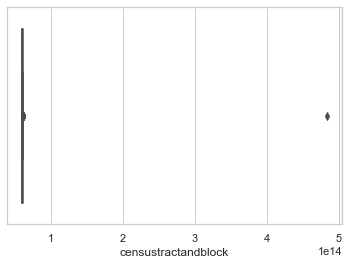

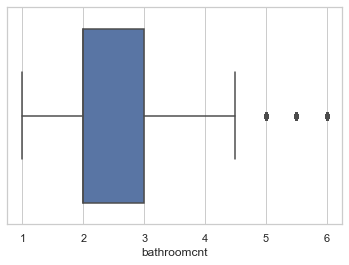

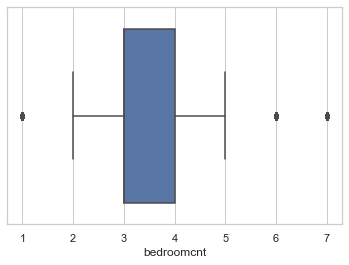

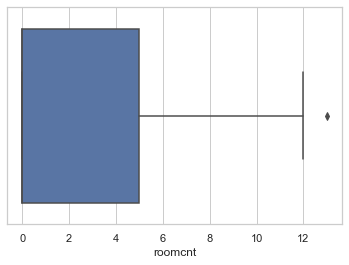

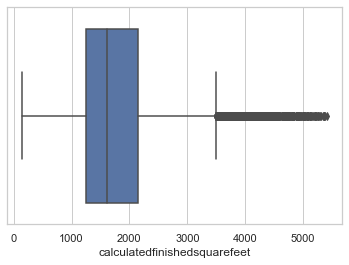

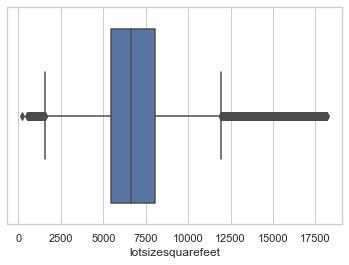

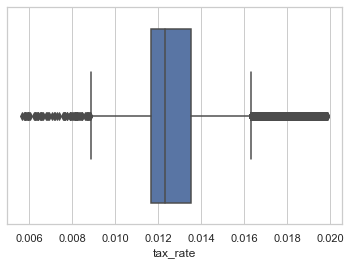

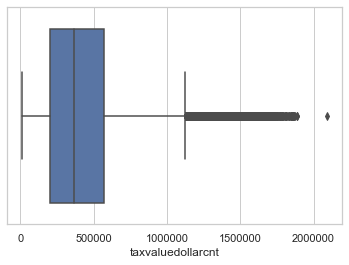

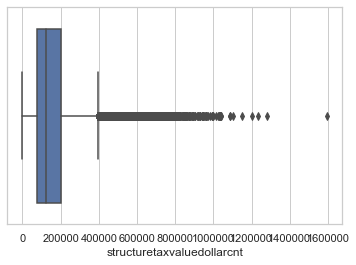

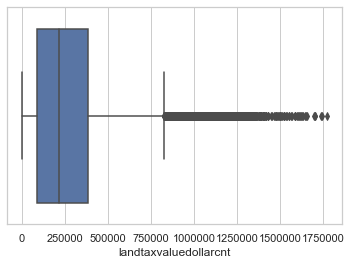

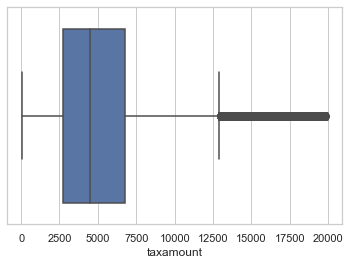

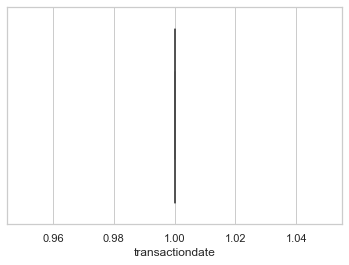

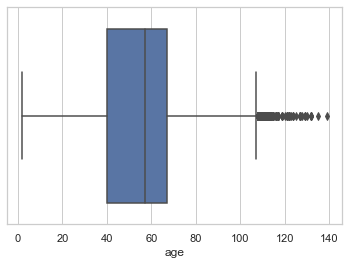

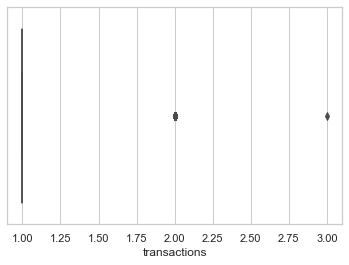

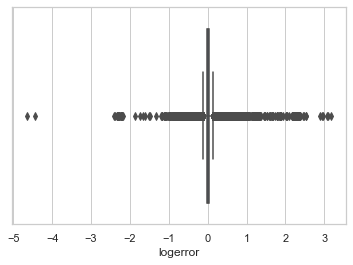

In [25]:
#visualize outliers
explore.df_feature_box(df)

In [26]:
# remove outlier
col_out = ["tax_rate", "bathroomcnt", "bedroomcnt","calculatedfinishedsquarefeet", "lotsizesquarefeet", "roomcnt", "taxamount"]

In [27]:
def remove_outliers_iqr(df, col_out):
    for col in enumerate(col_out):
        col = str(col[1])
        
        q1, q3 = df[col].quantile([.25, .75])
        iqr = q3 - q1
        ub = q3 + 3 * iqr
        lb = q1 - 3 * iqr

        df = df[df[col] <= ub]
        df = df[df[col] >= lb]
    return df

In [28]:
df = remove_outliers_iqr(df, col_out)

In [29]:
df = df[['county','latitude', 'longitude','regionidcity','regionidzip',\
         'rawcensustractandblock','censustractandblock',\
         'bathroomcnt', 'bedroomcnt','roomcnt',\
         'calculatedfinishedsquarefeet','lotsizesquarefeet',\
        'tax_rate','taxvaluedollarcnt',\
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount',\
        'transactiondate','age','transactions','logerror']]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43256 entries, 17052889 to 13976300
Data columns (total 21 columns):
county                          43256 non-null object
latitude                        43256 non-null float64
longitude                       43256 non-null float64
regionidcity                    42487 non-null float64
regionidzip                     43246 non-null float64
rawcensustractandblock          43256 non-null float64
censustractandblock             43213 non-null float64
bathroomcnt                     43256 non-null float64
bedroomcnt                      43256 non-null int64
roomcnt                         43256 non-null int64
calculatedfinishedsquarefeet    43256 non-null float64
lotsizesquarefeet               43256 non-null float64
tax_rate                        43256 non-null float64
taxvaluedollarcnt               43256 non-null float64
structuretaxvaluedollarcnt      43225 non-null float64
landtaxvaluedollarcnt           43256 non-null float64
taxamo

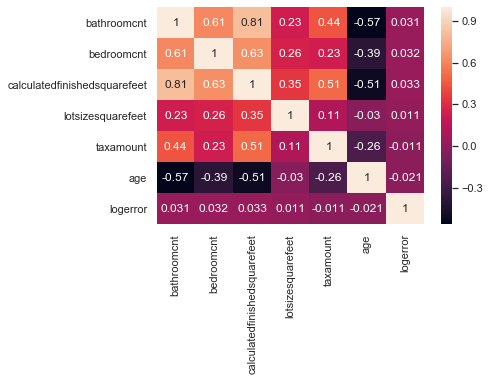

In [31]:
sns.heatmap(df[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','taxamount','age','logerror']].corr(), annot=True)


**Split into train/ test** train_size = 0.8, random_state = 123

In [17]:
train, test = prepare.split_my_data(df)

In [18]:
col_impute_mean = ['tax_rate', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 
                   'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']

col_impute_mode = ['regionidcity', 'regionidzip','censustractandblock']

In [19]:
train, test = prepare.impute(train, test, "mean", col_impute_mean)
train, test = prepare.impute(train, test, "most_frequent", col_impute_mode)

In [20]:
train["transactions"] = train.transactions.astype("float")

train["bedroomcnt"] = train.bedroomcnt.astype("int")
train["roomcnt"] = train.roomcnt.astype("int")

train["regionidcity"] = train.regionidcity.astype("object")
train["regionidzip"] = train.regionidzip.astype("object")


test["transactions"] = test.transactions.astype("float")

test["bedroomcnt"] = test.bedroomcnt.astype("int")
test["roomcnt"] = test.roomcnt.astype("int")

test["regionidcity"] = test.regionidcity.astype("object")
test["regionidzip"] = test.regionidzip.astype("object")


In [21]:
# Lost some more rows due to dropping outliers
print(df.shape)
print(train.shape)
print(test.shape)

(44749, 21)
(35087, 21)
(8772, 21)


In [31]:
df["transactions"] = df.transactions.astype("float")

df["bedroomcnt"] = df.bedroomcnt.astype("int")
df["roomcnt"] = df.roomcnt.astype("int")

df["regionidcity"] = df.regionidcity.astype("object")
df["regionidzip"] = df.regionidzip.astype("object")

train["transactions"] = train.transactions.astype("float")

train["bedroomcnt"] = train.bedroomcnt.astype("int")
train["roomcnt"] = train.roomcnt.astype("int")

train["regionidcity"] = train.regionidcity.astype("object")
train["regionidzip"] = train.regionidzip.astype("object")

test["transactions"] = test.transactions.astype("float")

test["bedroomcnt"] = test.bedroomcnt.astype("int")
test["roomcnt"] = test.roomcnt.astype("int")

test["regionidcity"] = test.regionidcity.astype("object")
test["regionidzip"] = test.regionidzip.astype("object")


**Scaling the data**

In [32]:
mm = ['latitude','longitude']
std = ['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']

In [33]:
scaler, train_scaled, test_scaled = split_scale.standard_scaler\
(train[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']],\
test[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']])

train1 = train.drop(columns = std)
train1 = train1.join(train_scaled)
test1 = test.drop(columns = std)
test1 = test1.join(test_scaled)

In [34]:
scaler, train_scaled, test_scaled = split_scale.min_max_scaler\
(train[['latitude','longitude']], test[['latitude','longitude']])

train1 = train1.drop(columns = mm)
train1 = train1.join(train_scaled)
test1 = test1.drop(columns = mm)
test1 = test1.join(test_scaled)

In [35]:
train1.head()

,county,regionidcity,regionidzip,rawcensustractandblock,censustractandblock,roomcnt,tax_rate,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,...,transactiondate,transactions,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,age,latitude,longitude
parcelid,,,,,,,,,,,,,,,,,,,,,
14115188,Orange,"16,764.00","97,021.00","60,590,871.06","60,590,871,061,001.00",6,0.01,"476,345.00","69,937.00","406,408.00",...,8,1.00,-0.01,-0.21,-0.29,-0.59,-0.16,0.18,0.35,0.81
17202081,Ventura,"25,974.00","97,097.00","61,110,076.10","61,110,076,101,023.00",7,0.01,"269,973.00","175,489.00","94,484.00",...,7,1.00,0.07,0.39,-0.29,-0.01,-0.05,-1.13,0.67,0.30
11867910,Los Angeles,"50,677.00","96,531.00","60,374,808.04","60,374,808,042,002.00",0,0.01,"92,656.00","16,174.00","76,482.00",...,5,1.00,-0.02,-1.42,-1.43,-1.34,0.21,1.80,0.55,0.69
12888153,Los Angeles,"20,008.00","96,506.00","60,374,024.02","60,374,024,023,004.00",0,0.01,"288,484.00","117,834.00","170,650.00",...,4,1.00,0.03,-1.42,-0.29,-0.91,-0.27,0.68,0.51,0.89
17055276,Ventura,"13,091.00","97,099.00","61,110,009.03","61,110,009,031,015.00",6,0.01,"820,000.00","287,000.00","533,000.00",...,6,1.00,0.09,-0.82,-1.43,-0.62,1.22,1.58,0.80,0.11


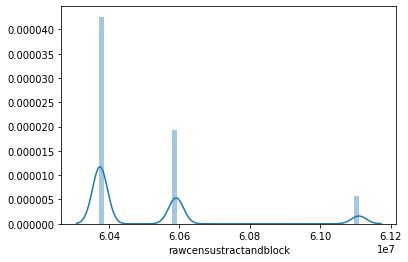

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


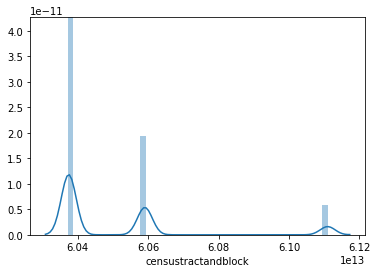

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


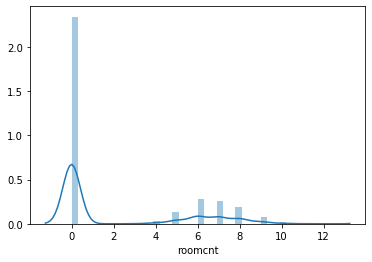

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


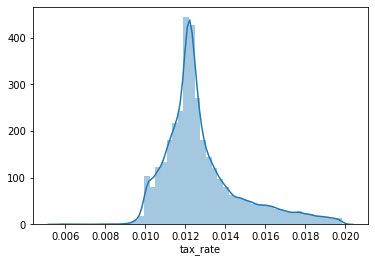

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


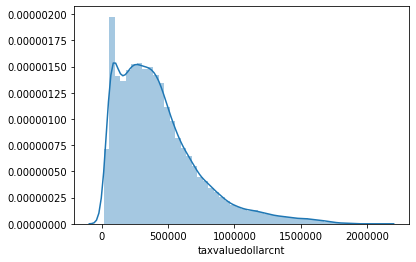

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


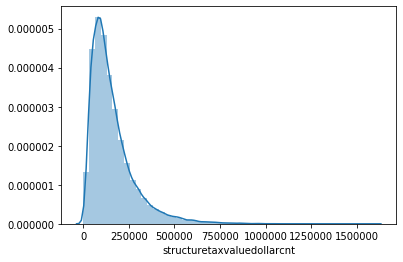

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


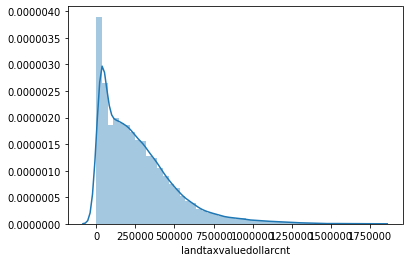

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


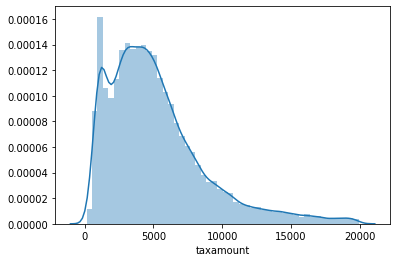

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


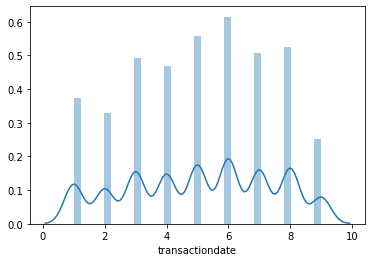

6    5231
5    4737
8    4476
7    4322
3    4195
4    3994
1    3190
2    2806
9    2136
Name: transactiondate, dtype: int64


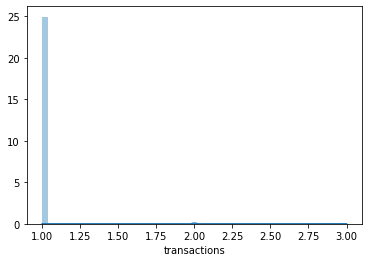

1.00    35013
2.00       73
3.00        1
Name: transactions, dtype: int64


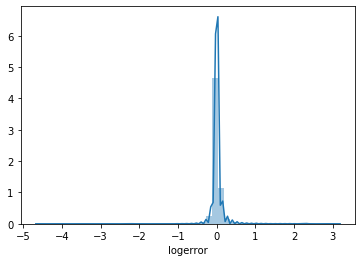

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


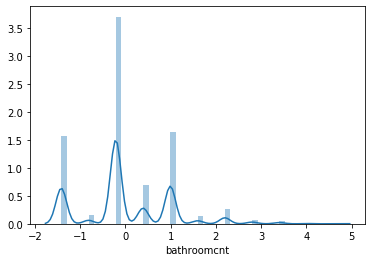

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


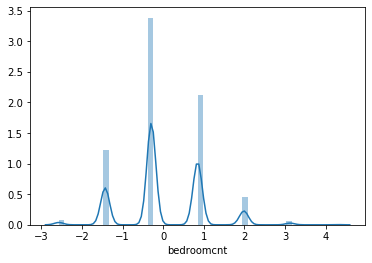

-0.29    16223
 0.85    10154
-1.43     5822
 1.99     2207
-2.57      375
 3.13      267
 4.27       39
Name: bedroomcnt, dtype: int64


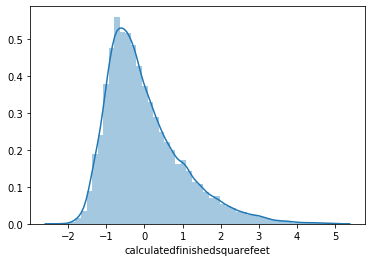

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


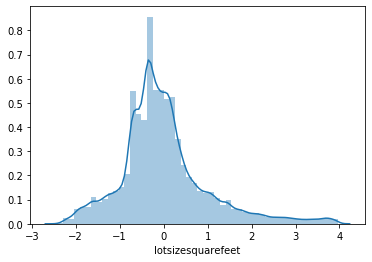

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


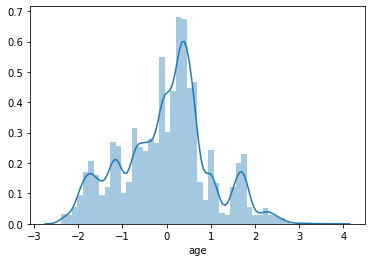

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


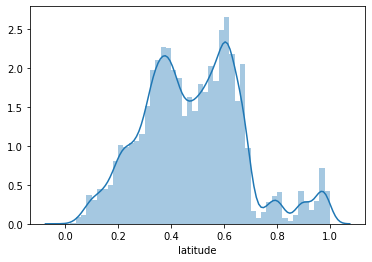

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


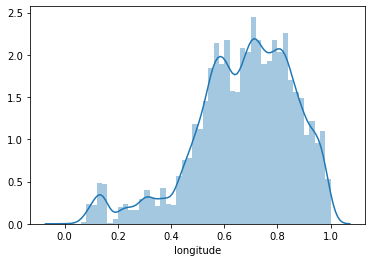

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


In [36]:
num_plot = list(train1.select_dtypes(np.number).columns)
for n in num_plot:
    sns.distplot(train1[n].dropna())
    plt.show()
    if train1[n].nunique() > 10:
        print(train1.age.value_counts(bins = 10))
    else:
        print(train1[n].value_counts())

In [37]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.describe())

                  latitude            longitude  rawcensustractandblock  \
count            44,749.00            44,749.00               44,749.00   
mean                 34.00              -118.19           60,498,234.65   
std                   0.26                 0.36              208,557.53   
min                  33.34              -119.48           60,371,011.10   
25%                  33.82              -118.39           60,374,006.02   
50%                  34.00              -118.14           60,376,021.06   
75%                  34.18              -117.92           60,590,524.10   
max                  34.72              -117.55           61,110,091.00   

         censustractandblock          bathroomcnt           bedroomcnt  \
count              44,703.00            44,749.00            44,749.00   
mean   60,507,465,377,727.27                 2.19                 3.25   
std     2,009,274,071,473.51                 0.84                 0.88   
min    60,371,011,101,000.00

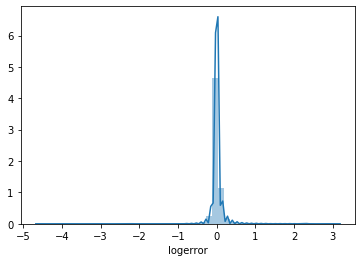

In [38]:
# overall logerror distribution 
sns.distplot(df.logerror)

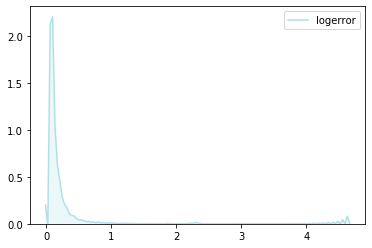

In [39]:
sns.kdeplot(df.logerror.abs(), shade=True, color="powderblue")
plt.show()

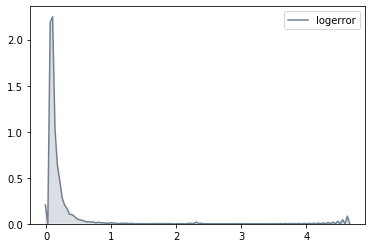

In [41]:
sns.kdeplot(train1.logerror.abs(), shade=True, color="slategray")

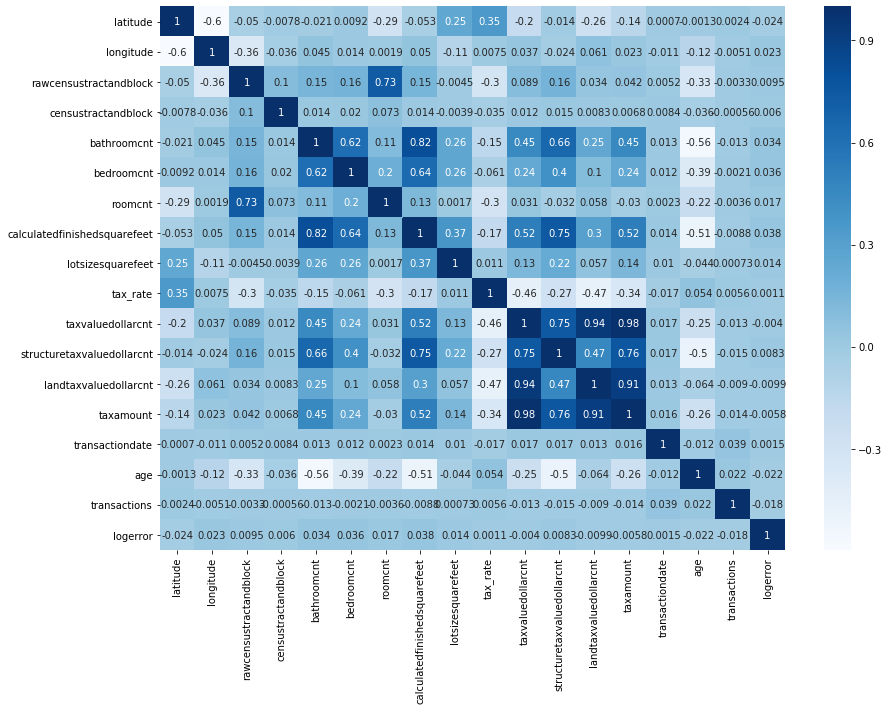

In [42]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

In [43]:
train.corr()

,latitude,longitude,rawcensustractandblock,censustractandblock,bathroomcnt,bedroomcnt,roomcnt,calculatedfinishedsquarefeet,lotsizesquarefeet,tax_rate,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,transactiondate,age,transactions,logerror
latitude,1.00,-0.59,-0.04,-0.04,-0.03,0.01,-0.28,-0.06,0.26,0.34,-0.20,-0.02,-0.26,-0.15,-0.01,0.01,0.01,-0.03
longitude,-0.59,1.00,-0.38,-0.38,0.05,0.01,-0.00,0.05,-0.11,0.02,0.04,-0.02,0.06,0.03,-0.01,-0.13,-0.01,0.02
rawcensustractandblock,-0.04,-0.38,1.00,1.00,0.15,0.16,0.73,0.16,-0.00,-0.30,0.09,0.16,0.04,0.05,0.00,-0.34,-0.01,0.01
censustractandblock,-0.04,-0.38,1.00,1.00,0.15,0.16,0.73,0.16,-0.00,-0.30,0.09,0.16,0.04,0.05,0.00,-0.34,-0.01,0.01
bathroomcnt,-0.03,0.05,0.15,0.15,1.00,0.61,0.12,0.82,0.26,-0.16,0.45,0.65,0.25,0.45,0.01,-0.56,-0.01,0.03
bedroomcnt,0.01,0.01,0.16,0.16,0.61,1.00,0.20,0.63,0.26,-0.06,0.24,0.40,0.11,0.24,0.01,-0.38,-0.00,0.03
roomcnt,-0.28,-0.00,0.73,0.73,0.12,0.20,1.00,0.13,0.00,-0.30,0.03,-0.02,0.06,-0.02,-0.00,-0.23,-0.01,0.02
calculatedfinishedsquarefeet,-0.06,0.05,0.16,0.16,0.82,0.63,0.13,1.00,0.37,-0.18,0.52,0.74,0.31,0.52,0.01,-0.50,-0.01,0.04
lotsizesquarefeet,0.26,-0.11,-0.00,-0.00,0.26,0.26,0.00,0.37,1.00,0.01,0.13,0.22,0.06,0.13,0.01,-0.04,0.00,0.01
tax_rate,0.34,0.02,-0.30,-0.30,-0.16,-0.06,-0.30,-0.18,0.01,1.00,-0.47,-0.29,-0.47,-0.36,-0.02,0.06,0.01,0.00


**Takeaways:** Nothing huge stands out in regards to correlation with our taget, log error.

**Task:** Look closer at individual features with more visualizations and statistical testing.

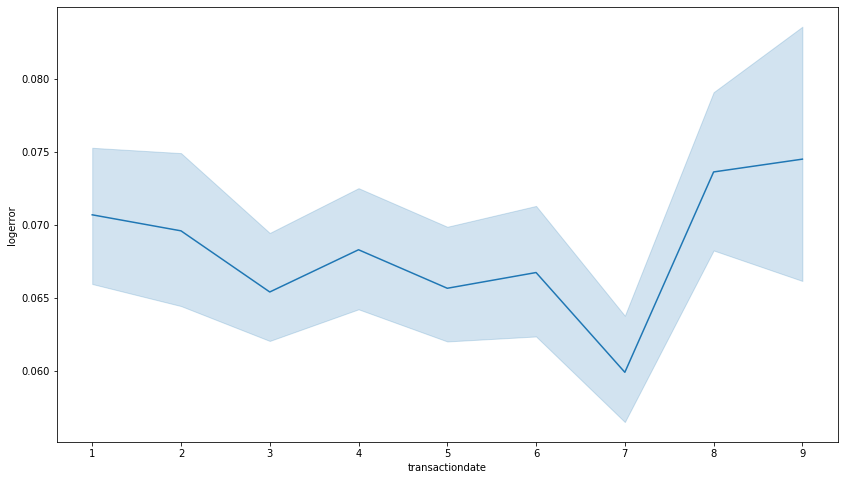

In [64]:
plt.figure(figsize=(14,8))
sns.lineplot(train.transactiondate, train.logerror.abs())

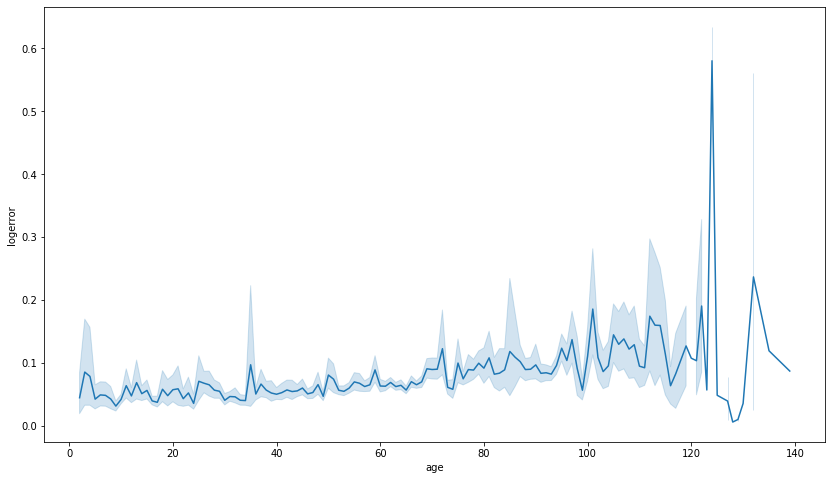

In [65]:
plt.figure(figsize=(14,8))
sns.lineplot(x = train.age, y = train.logerror.abs())

In [46]:
r, p = stats.pearsonr(train.age, train.logerror)
print('r:',r, 'p:',p)

r: -0.023391296591064877 p: 1.1760032044885623e-05


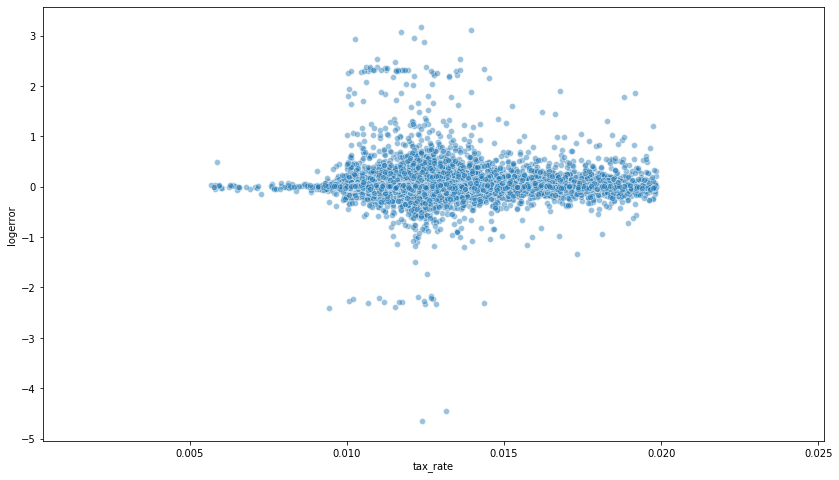

In [47]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='tax_rate', y='logerror', data=train, alpha=.45)

In [48]:
r, p = stats.pearsonr(train.tax_rate, train.logerror)
print('r:',r, 'p:',p)

r: 5.962866949089734e-05 p: 0.9910886439291061


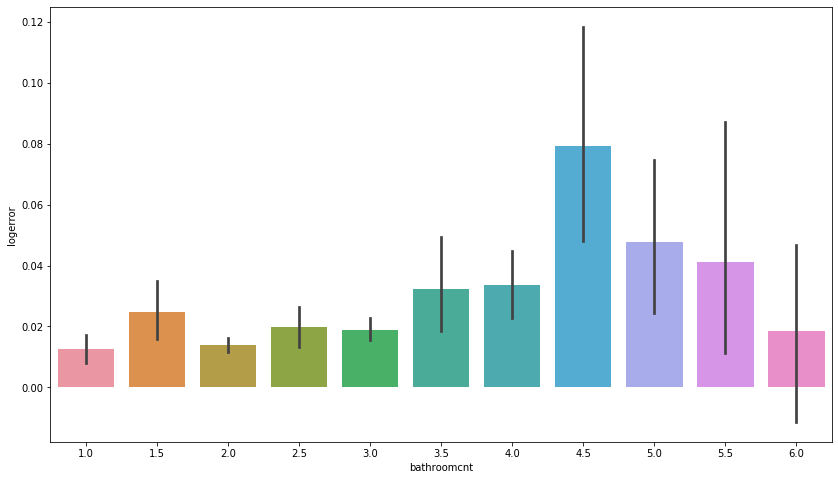

In [49]:
plt.figure(figsize=(14,8))
sns.barplot(x='bathroomcnt', y='logerror', data=train)

In [50]:
r, p = stats.pearsonr(train.bathroomcnt, train.logerror)
print('r:',r, 'p:',p)

r: 0.034426936624543505 p: 1.1157581250136825e-10


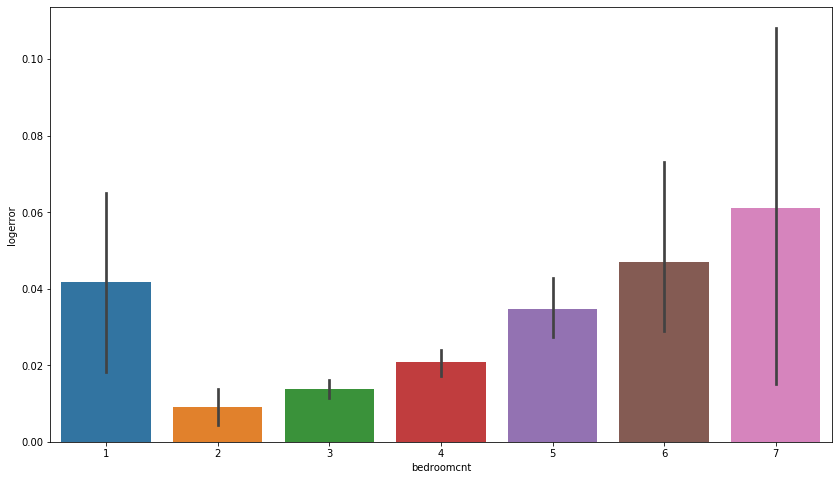

In [51]:
plt.figure(figsize=(14,8))
sns.barplot(x='bedroomcnt', y='logerror', data=train)

In [52]:
r, p = stats.pearsonr(train.bedroomcnt, train.logerror)
print('r:',r, 'p:',p)

r: 0.03368630254077797 p: 2.7630050113503756e-10


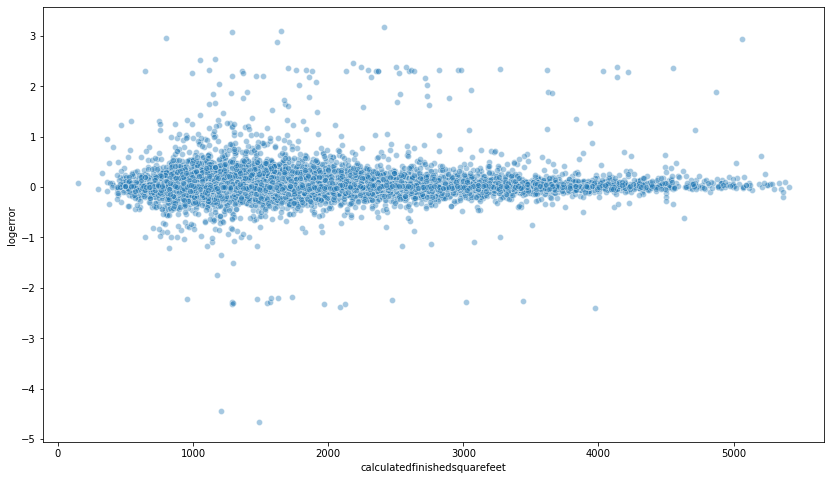

In [53]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, alpha=.4)

In [54]:
r, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.logerror)
print('r:',r, 'p:',p)

r: 0.03874507300022095 p: 3.8706163630304396e-13


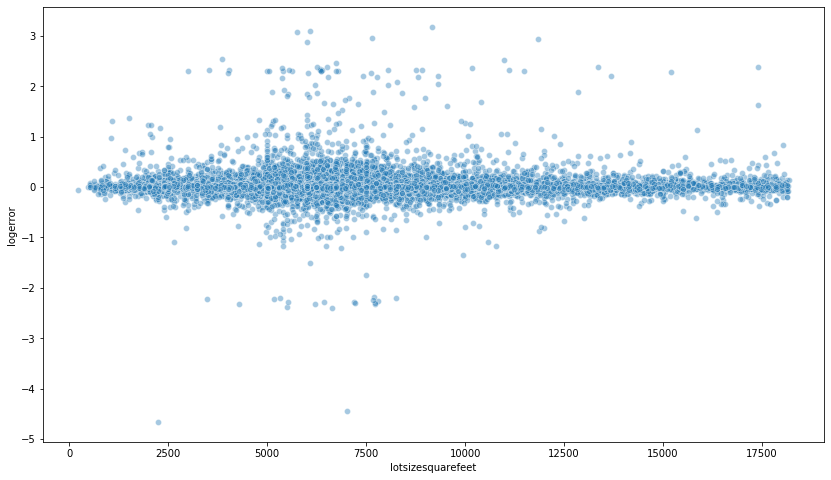

In [55]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='lotsizesquarefeet', y='logerror', data=train, alpha=.4)

In [56]:
r, p = stats.pearsonr(train.lotsizesquarefeet, train.logerror)
print('r:',r, 'p:',p)

r: 0.010252869023786595 p: 0.054794685125985086


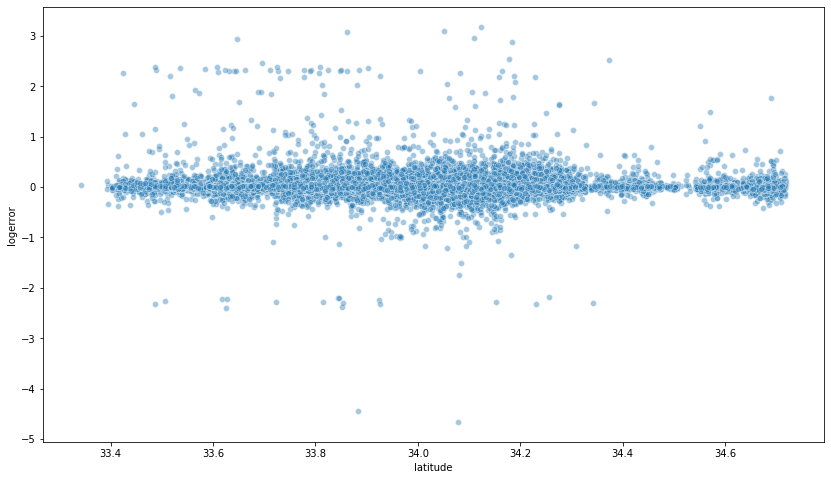

In [57]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='latitude', y='logerror', data=train, alpha=.4)

In [58]:
r, p = stats.pearsonr(train.latitude, train.logerror)
print('r:',r, 'p:',p)

r: -0.025227814058630324 p: 2.2883031354739516e-06


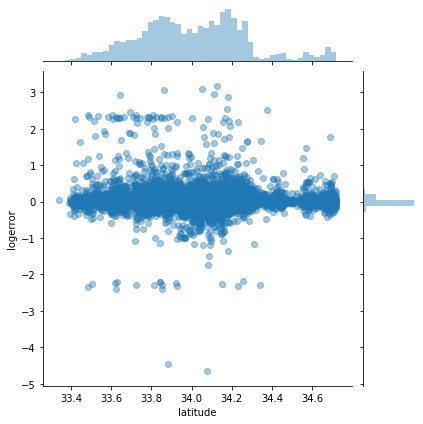

In [59]:
sns.jointplot(x='latitude', y='logerror', data=train, alpha=.4)

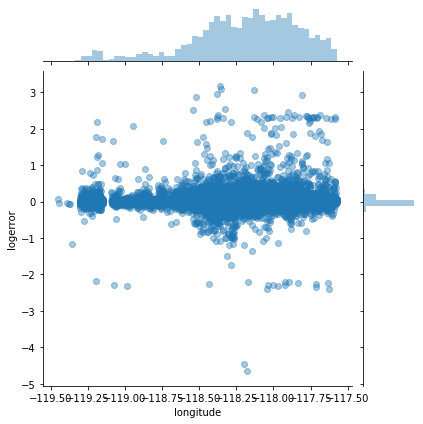

In [62]:
sns.jointplot(x='longitude', y='logerror', data=train, alpha=.4)

In [61]:
r, p = stats.pearsonr(train.longitude, train.logerror)
print('r:',r, 'p:',p)

r: 0.01971799065207356 p: 0.0002210078510970351


[[-1.17863593e+02  3.40649418e+01  1.12171446e-02]
 [-1.18368363e+02  3.41156092e+01 -1.17742018e-02]
 [-1.17860938e+02  3.38592555e+01  7.82184036e-03]
 [-1.17662859e+02  3.35667948e+01  1.32438976e-02]
 [-1.19172377e+02  3.42551311e+01  1.41950418e-02]
 [-1.18319644e+02  3.38827492e+01  3.89260781e-03]
 [-1.18018590e+02  3.38347540e+01  2.26052618e+00]
 [-1.18144396e+02  3.46403069e+01  6.41506372e-03]
 [-1.18834971e+02  3.42326196e+01  1.17855665e-02]
 [-1.18536783e+02  3.42157178e+01  1.40054638e-02]
 [-1.18088015e+02  3.38646055e+01  5.00824176e-03]
 [-1.18292259e+02  3.40387956e+01 -4.47547795e-01]
 [-1.17961675e+02  3.38372821e+01  3.69441086e-01]
 [-1.17902636e+02  3.37040277e+01  2.44671447e-03]
 [-1.18150302e+02  3.38930942e+01 -2.43204133e+00]
 [-1.18518152e+02  3.44231837e+01  1.09374176e-02]
 [-1.18334751e+02  3.40953966e+01  3.34132408e-01]
 [-1.18193733e+02  3.39762286e+01  1.04493146e+00]
 [-1.18137504e+02  3.41207173e+01 -4.01869865e-03]]
581.7792659157093


Text(0, 0.5, 'inertia')

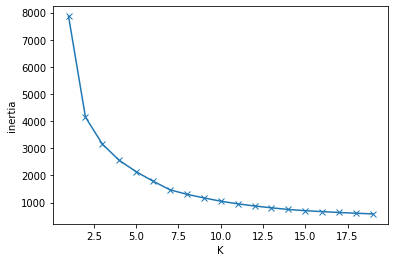

In [68]:
subset = train[['longitude', 'latitude','logerror']]

k_values = []
inertias = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(subset)
    inertias.append(kmeans.inertia_)
    k_values.append(k)
print(kmeans.cluster_centers_)
# sum of squared errors from each data point to the cluster center
print(kmeans.inertia_)
plt.plot(k_values, inertias, marker='x')
plt.xlabel('K')
plt.ylabel('inertia')

In [69]:
train['logerror_abs'] = train.logerror.abs()
subset = train[['longitude', 'latitude','logerror']]
kmeans = KMeans(n_clusters=7).fit(subset)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=subset.columns)

[Text(0.5, 0, 'Logerror'), Text(0.5, 0, 'Latitude'), Text(0.5, 0, 'Longitude')]

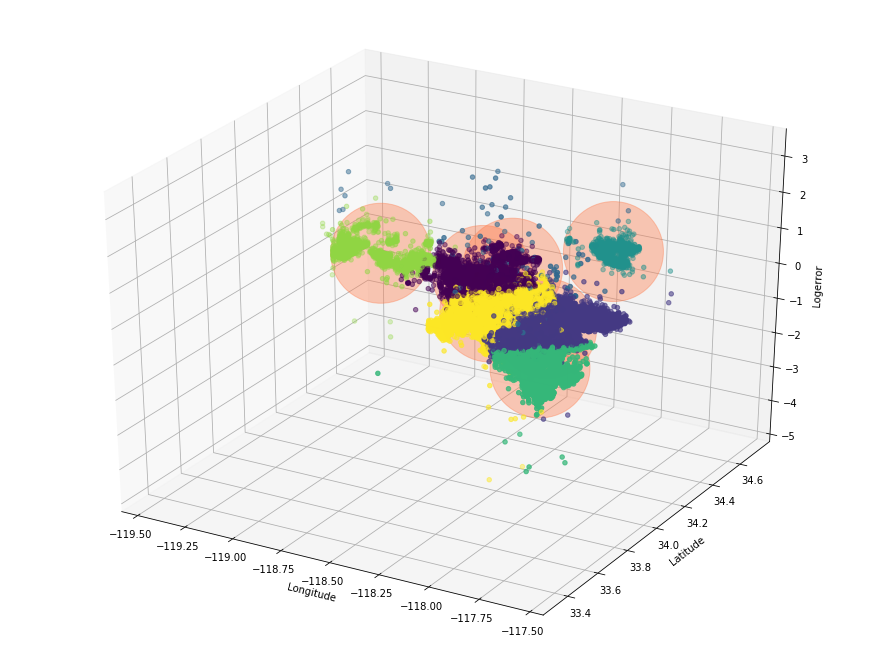

In [70]:
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(train.longitude, train.latitude, train.logerror, c=kmeans.labels_)
ax.scatter(centers.longitude, centers.latitude, centers.logerror, c='coral', s=10000, alpha=.4)
ax.set(xlabel='Longitude', ylabel='Latitude', zlabel='Logerror')

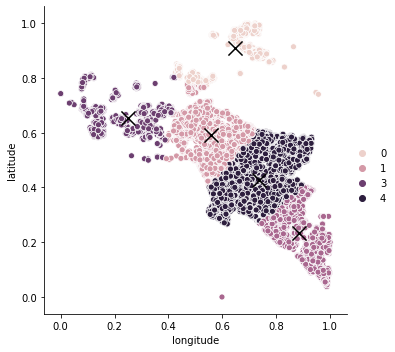

In [71]:
X = train1[['longitude', 'latitude']]

kmeans = KMeans(n_clusters=5, random_state=123).fit(X)

X['cluster'] = 'clusters ' + pd.Series(kmeans.predict(X)).astype(str)

sns.relplot(data=X, hue=kmeans.labels_, x='longitude', y='latitude')
plt.scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], marker='x', s=200, c='black')

In [83]:
# We will be using these clusters to plug into our model
kmeans = KMeans(n_clusters=5, random_state=123).fit(train1[['longitude', 'latitude']])
train1['cluster'] = kmeans.predict(train1[['longitude', 'latitude']])

cluster_0 = train1[train1.cluster == 0]
cluster_1 = train1[train1.cluster == 1]
cluster_2 = train1[train1.cluster == 2]
cluster_3 = train1[train1.cluster == 3]
cluster_4 = train1[train1.cluster == 4]

In [84]:
print(cluster_0.shape)
print(cluster_1.shape)
print(cluster_2.shape)
print(cluster_3.shape)
print(cluster_4.shape)

(6641, 23)
(3207, 23)
(11149, 23)
(1771, 23)
(12319, 23)


In [85]:
def encode(train, test, col_name):
    from sklearn.preprocessing import LabelEncoder
    
    # Integer Encoding
    int_encoder = LabelEncoder()
    train[col_name] = int_encoder.fit_transform(train[col_name])
    test[col_name] = int_encoder.transform(test[col_name])
    
    return train, test

In [86]:
train1, test1 = encode(train, test, 'county')

In [87]:
train1['age'] = train1['age'].astype(int)
train1['lotsizesquarefeet'] = train1['lotsizesquarefeet'].astype(int)
train1['calculatedfinishedsquarefeet'] = train1['calculatedfinishedsquarefeet'].astype(int)
train1['bedroomcnt'] = train1['bedroomcnt'].astype(int)
train1['bathroomcnt'] = train1['bathroomcnt'].astype(int)

In [88]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35087 entries, 14115188 to 11065285
Data columns (total 23 columns):
county                          35087 non-null int64
latitude                        35087 non-null float64
longitude                       35087 non-null float64
regionidcity                    35087 non-null object
regionidzip                     35087 non-null object
rawcensustractandblock          35087 non-null float64
censustractandblock             35087 non-null float64
bathroomcnt                     35087 non-null int64
bedroomcnt                      35087 non-null int64
roomcnt                         35087 non-null int64
calculatedfinishedsquarefeet    35087 non-null int64
lotsizesquarefeet               35087 non-null int64
tax_rate                        35087 non-null float64
taxvaluedollarcnt               35087 non-null float64
structuretaxvaluedollarcnt      35087 non-null float64
landtaxvaluedollarcnt           35087 non-null float64
taxamount      

In [89]:
train1.head()

,county,latitude,longitude,regionidcity,regionidzip,rawcensustractandblock,censustractandblock,bathroomcnt,bedroomcnt,roomcnt,...,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,transactiondate,age,transactions,logerror,logerror_abs,cluster
parcelid,,,,,,,,,,,,,,,,,,,,,
14115188,1,33.82,-117.94,"16,764.00","97,021.00","60,590,871.06","60,590,871,061,001.00",2,3,6,...,"476,345.00","69,937.00","406,408.00","5,614.40",8,59,1.00,-0.01,0.01,4
17202081,2,34.27,-118.88,"25,974.00","97,097.00","61,110,076.10","61,110,076,101,023.00",2,3,7,...,"269,973.00","175,489.00","94,484.00","3,089.74",7,30,1.00,0.07,0.07,1
11867910,0,34.10,-118.15,"50,677.00","96,531.00","60,374,808.04","60,374,808,042,002.00",1,2,0,...,"92,656.00","16,174.00","76,482.00","1,346.31",5,95,1.00,-0.02,0.02,4
12888153,0,34.05,-117.77,"20,008.00","96,506.00","60,374,024.02","60,374,024,023,004.00",1,3,0,...,"288,484.00","117,834.00","170,650.00","3,667.88",4,70,1.00,0.03,0.03,4
17055276,2,34.45,-119.25,"13,091.00","97,099.00","61,110,009.03","61,110,009,031,015.00",1,2,6,...,"820,000.00","287,000.00","533,000.00","9,701.94",6,90,1.00,0.09,0.09,1


In [90]:
# Decision Tree Regressor
x_train1 = train1[['county', 'age', 'cluster', 'transactiondate', 'bedroomcnt', 'bathroomcnt', 'lotsizesquarefeet', 'calculatedfinishedsquarefeet']]
y_train1 = train1[['logerror']]
#x = test1[['county', 'age', 'cluster', 'transactiondate', 'lotsizesquarefeet', 'calculatedfinishedsquarefeet', 'bedroomcnt', 'bathroomcnt']]
#y = test1[['logerror']]

In [91]:
regressor = DecisionTreeRegressor(max_depth=10, random_state=123)
regressor.fit(x_train1, y_train1)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=123, splitter='best')

In [92]:
y_pred = regressor.predict(x_train1)
y_pred[0:5]

array([ 0.01544314,  0.01102214,  0.00932661,  0.01544314, -0.03104655])

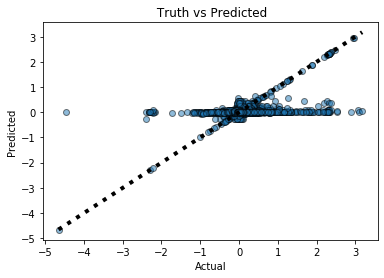

In [93]:
fig, ax = plt.subplots()
ax.scatter(y_train1, y_pred, edgecolors=(0, 0, 0), alpha=.5)
ax.plot([y_train1.min(), y_train1.max()], [y_train1.min(), y_train1.max()], 'k:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title(" Truth vs Predicted")
plt.show()

Regression algorithms:

decision tree regression
logistic regression
linear regression
polynimial regression
ridge regression
lasso regression